<a href="https://colab.research.google.com/github/vicperotti/ExtractTweetDetails/blob/master/Tweepy_Search_API_into_dataframe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using tweepy's search API

In [1]:
import tweepy
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
#from my developer account app
api_key = "DiJDNAjwROn5vaUl4g7Mvjxd0"
api_secret = "CMN6xWRtoDhiTO9HdN2jyIvT9Pul4I5dFsmX8ge6ETBZkGrZx0"
access_token = "1626161-DTJRUNpOa5Sk6ZICYvvPBZtUFYwxbwB5p0DnwAdbrm"
access_secret = "l6rszj9OvQdRHCOccSesz5YOG4Oq6slrmTdFH7zJizNYj"

In [6]:
def limit_handled(cursor):
    while True:
        try:
            yield cursor.next()
        except tweepy.RateLimitError:
            time.sleep(15 * 60)
        except StopIteration:
          return



In [24]:
#get the tweets using the search API

auth = tweepy.OAuthHandler(api_key, api_secret)
#auth.set_access_token(access_token, access_secret) I read it might be better without access tokens

query = "spacex -filter:retweets"
max_tweets = 20000
api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
bitcoincashsearch = [status for status in tweepy.Cursor(api.search, q=query, count=100).items(max_tweets) ]
len(bitcoincashsearch)

20000

In [25]:
#grab a subset of the columns
justthegoodstuff = [[tweet.created_at, tweet.text, tweet.retweet_count, tweet.favorite_count, tweet.user.screen_name, tweet.user.location] for tweet in bitcoincashsearch]


In [13]:
#justthegoodstuff

In [26]:
#and then make a dataframe
df = pd.DataFrame(justthegoodstuff, columns=['created_at','text','retweet_count','favorite_count','screenname','location'])

In [27]:
df['screenname'].value_counts()

TUA_Spacex         142
spacex_45           77
SpaceXMR            55
hiddengems777       52
spacex_cowboy90     51
                  ... 
Avalon_Ego           1
92newschannel        1
stinky561            1
Sleinadretep         1
LorienteMarc         1
Name: screenname, Length: 12932, dtype: int64

In [18]:
!pip install afinn

     |████████████████████████████████| 61kB 2.6MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp37-none-any.whl size=53451 sha256=8b8f3af054d2445a23e76435b87efd76673eedb593a8f6c614f19a21460d4e4e
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


In [28]:
from afinn import Afinn
afinn = Afinn(emoticons=True)
df['sentiment'] = df.apply (lambda row: afinn.score(row['text']), axis=1)
df.keys()

Index(['created_at', 'text', 'retweet_count', 'favorite_count', 'screenname',
       'location', 'sentiment'],
      dtype='object')

In [29]:
df

,created_at,text,retweet_count,favorite_count,screenname,location,sentiment
0,2021-03-25 14:40:28,"#elongate A fan boy company, hyped up stock va...",0,0,William79713238,USA,1.0
1,2021-03-25 14:40:18,"Yay, more space clutter 🤦 https://t.co/shrunAKjzd",0,0,Lewdeath1,"South West, England",0.0
2,2021-03-25 14:40:15,@GarzaHuracanGza @chematierra @metmex @webcams...,0,0,yunia_linares,"Puebla,Pue.",0.0
3,2021-03-25 14:39:59,@ABurghouts @GraafIvar @NASA @esa @SpaceX @vir...,0,0,phoebeliefs,,0.0
4,2021-03-25 14:39:40,@OtimMichael @nbstv @SpaceX For what purpose? ...,0,0,PSchliephacke,,-1.0
...,...,...,...,...,...,...,...
19995,2021-03-21 19:57:52,@MinerC1224 @MusicalWolves @SpacePadreIsle @Sp...,2,6,EgamerSfs,The Netherlands,3.0
19996,2021-03-21 19:57:34,@nielscallesoe Jeg tager skyklapper på og hepp...,0,0,shayera0,Denmark,0.0
19997,2021-03-21 19:57:16,@mxgxw_alpha Esa narrativa de prolongar la hum...,0,1,CrlsCuchilla,San Salvador,0.0
19998,2021-03-21 19:56:50,@RenataKonkoly @SpaceX @elonmusk idk is my fav...,0,1,EgamerSfs,The Netherlands,2.0


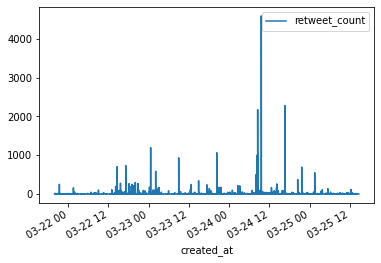

In [30]:
df.plot.line(x='created_at',y='retweet_count')

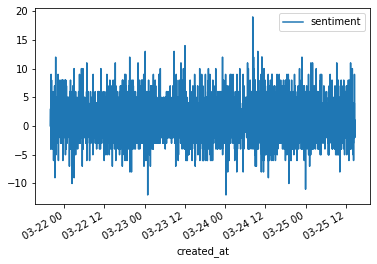

In [31]:
df.plot.line(x='created_at',y='sentiment')

In [32]:
df.to_csv('spacex.csv')